<a href="https://colab.research.google.com/github/milanajudiya/Online_Retail_Customer_Segmentation/blob/main/Online_Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

## **Import Libraries**

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from numpy import math
from datetime import datetime
from sklearn.preprocessing import StandardScaler

### Mount the drive

In [82]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
df = pd.read_excel("/content/drive/MyDrive/Customer Segmentation - Milan Ajudiya/Online Retail.xlsx")

In [84]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [85]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [86]:
df.shape

(541909, 8)

### **There is 541909 rows and 8 columns in this dataset**

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


### **Description and CustomerID column as null values.**

---



In [88]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [89]:
df_orcs = df.copy()

In [90]:
# calculate the null value in percentage in the all features

df_null = round((df_orcs.isnull().sum())/len(df_orcs)*100,2)

In [91]:
df_null

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

###**CustomerID column has 24% null values.**






### **Drop the row which has missing values because customerID has more number of missing values and it is unique.**

In [92]:
# drop the row which has missing values
df_orcs = df_orcs.dropna()


### **Now the shape of the datset after droping the null values is 406829 rows and 8 columns.**

In [93]:
df_orcs.shape

(406829, 8)

### **In InvoiceNo column some No's start with "C" that indicate Canceled transaction.**


In [94]:
# convert Invoice number column to strig datatype
df_orcs["InvoiceNo"] = df_orcs["InvoiceNo"].astype("str")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [95]:
# drop the InvoiceNo which is start with "c"
df_orcs  = df_orcs[~df_orcs["InvoiceNo"].str.contains("C")]

### **Now the shape of the datset after droping the InvoiceNo starts with "c" letter is 397924 rows and 8 columns.**

In [96]:
# shape of the dataset
df_orcs.shape

(397924, 8)

In [97]:
df_orcs.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


## **Exploratory Data Analysis**

In [98]:
# description of product and its count
df_description = df_orcs["Description"].value_counts().reset_index()
df_description.rename(columns={"index" : "product description", "Description" : "counts"},inplace=True)
df_description.head()

,product description,counts
0,WHITE HANGING HEART T-LIGHT HOLDER,2028
1,REGENCY CAKESTAND 3 TIER,1724
2,JUMBO BAG RED RETROSPOT,1618
3,ASSORTED COLOUR BIRD ORNAMENT,1408
4,PARTY BUNTING,1397


In [99]:
df_description.tail()

,product description,counts
3872,RUBY GLASS CLUSTER EARRINGS,1
3873,PINK CHRYSANTHEMUMS ART FLOWER,1
3874,72 CAKE CASES VINTAGE CHRISTMAS,1
3875,"WALL ART , THE MAGIC FOREST",1
3876,"PAPER CRAFT , LITTLE BIRDIE",1


Text(0.5, 1.0, 'Top 5 product description')

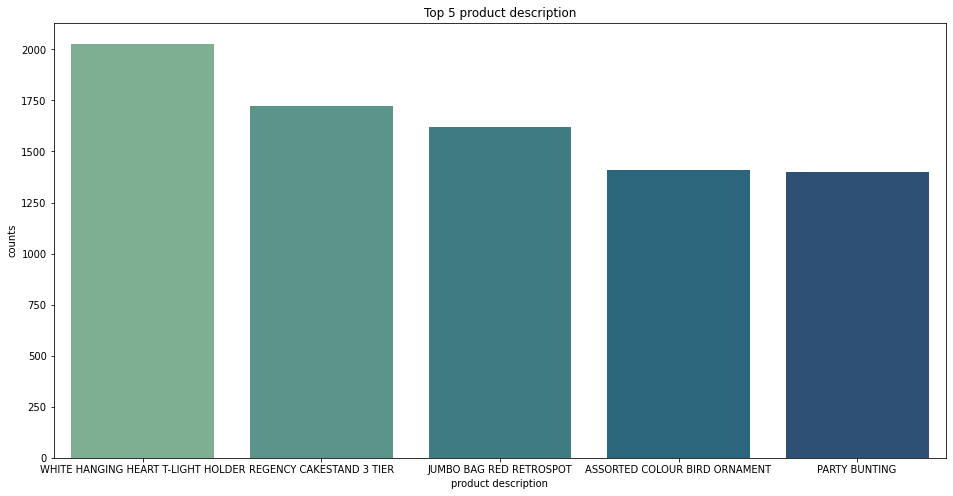

In [100]:
# top 5 product based on maximum sell
plt.figure(figsize=(16,8))
sns.barplot(x= "product description" , y="counts",palette = "crest", data=df_description[:5])
plt.title("Top 5 product description")

### **Top 5 product :**
1 . WHITE HANGING HEART T-LIGHT HOLDER	
2 .	REGENCY CAKESTAND 3 TIER	
3 .	JUMBO BAG RED RETROSPOT	
4 .	ASSORTED COLOUR BIRD ORNAMENT	
5 .	PARTY BUNTING	

Text(0.5, 1.0, 'Bottom 5 product description')

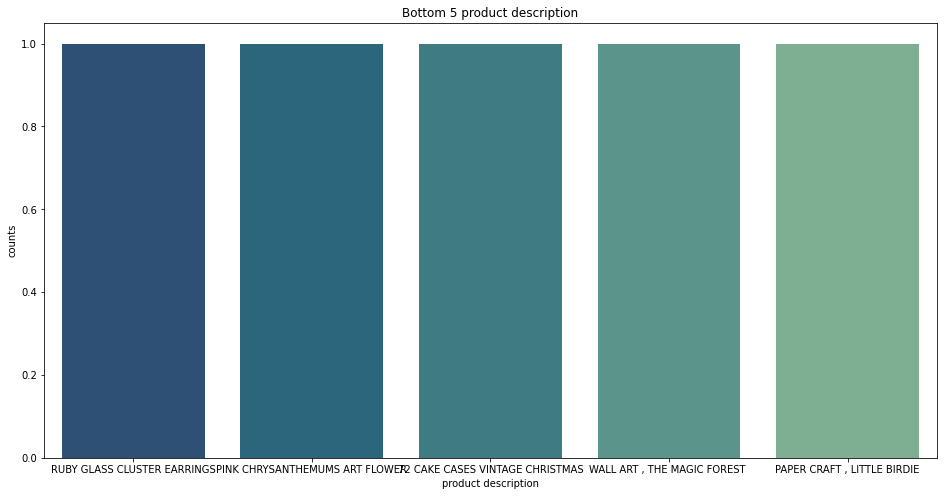

In [101]:
# botton 5 product based on sell
plt.figure(figsize=(16,8))
sns.barplot(x= "product description" , y="counts",palette = "crest_r", data=df_description[-5:])
plt.title("Bottom 5 product description")

### **Bottom 5 Products:**
RUBY GLASS CLUSTER EARRINGS	
PINK CHRYSANTHEMUMS ART FLOWER	
72 CAKE CASES VINTAGE CHRISTMAS	
WALL ART , THE MAGIC FOREST	
PAPER CRAFT , LITTLE BIRDIE	

In [102]:
df_orcs.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [103]:
df_country = df_orcs["Country"].value_counts().reset_index()
df_country.rename(columns={"index" : "Country name", "Country" : "counts"},inplace=True)
df_country.head()

,Country name,counts
0,United Kingdom,354345
1,Germany,9042
2,France,8342
3,EIRE,7238
4,Spain,2485


### Most of the transaction are done in united kingdom.

In [104]:
df_country.tail()

,Country name,counts
32,Lithuania,35
33,Brazil,32
34,Czech Republic,25
35,Bahrain,17
36,Saudi Arabia,9


Text(0.5, 1.0, 'Top 5 country based on the most number of customer')

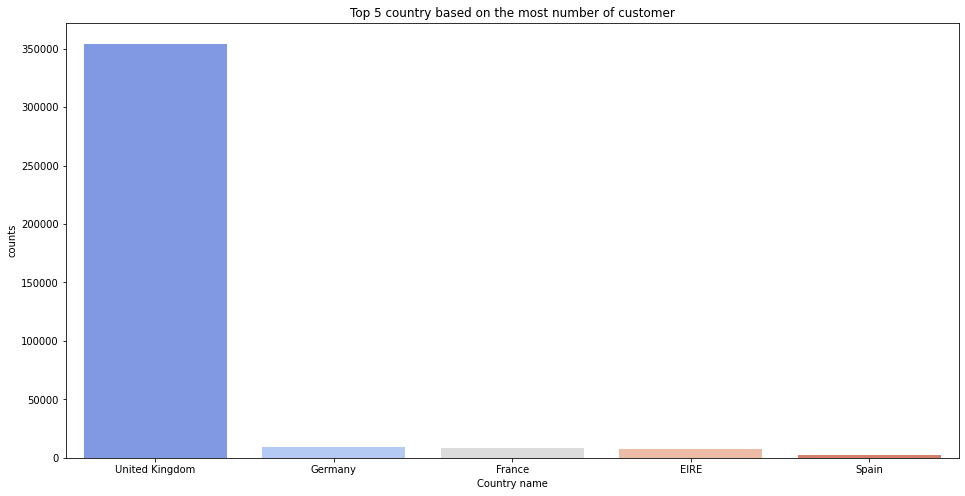

In [105]:
# top 5 countries
plt.figure(figsize=(16,8))
sns.barplot(x= "Country name" , y="counts",palette = "coolwarm", data=df_country[:5])
plt.title("Top 5 country based on the most number of customer")

### **From graph we can see that most of the customer is from United Kingdom, then germany, France, ireland, spain.**

Text(0.5, 1.0, 'bottom 5 country based on the most number of customer')

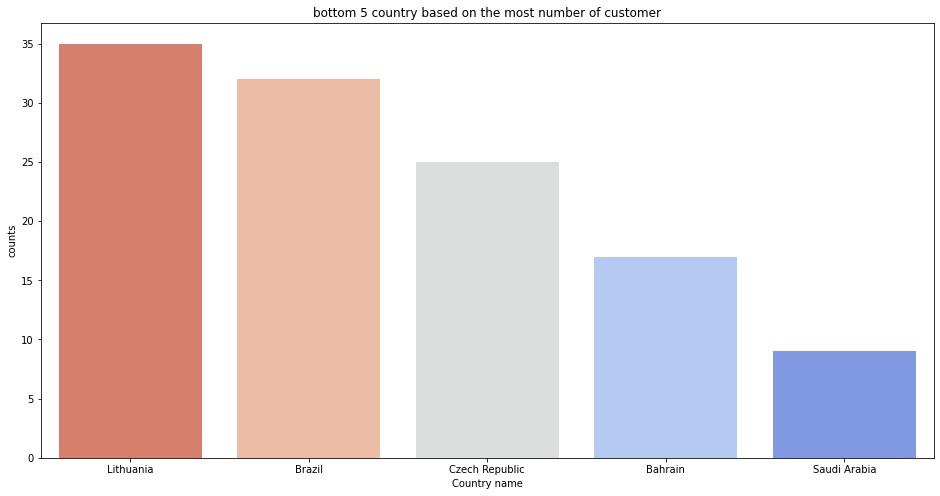

In [106]:
# bottom five countries
plt.figure(figsize=(16,8))
sns.barplot(x= "Country name" , y="counts", palette = "coolwarm_r", data=df_country[-5:])
plt.title("bottom 5 country based on the most number of customer")

### **Checking the distribution of numeric columns.**




/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


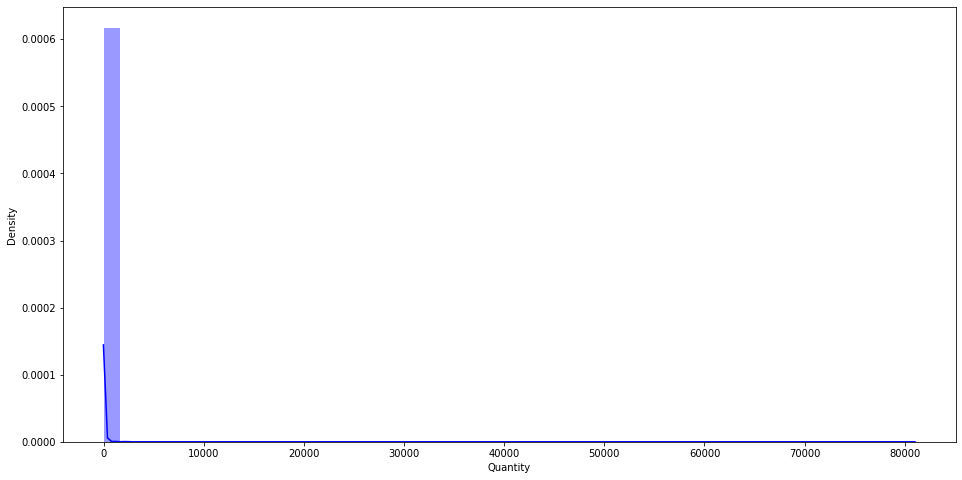

In [107]:
plt.figure(figsize=(16,8))
sns.distplot(df_orcs["Quantity"],color="Blue")

### **As see in graph the data is positively skewed.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


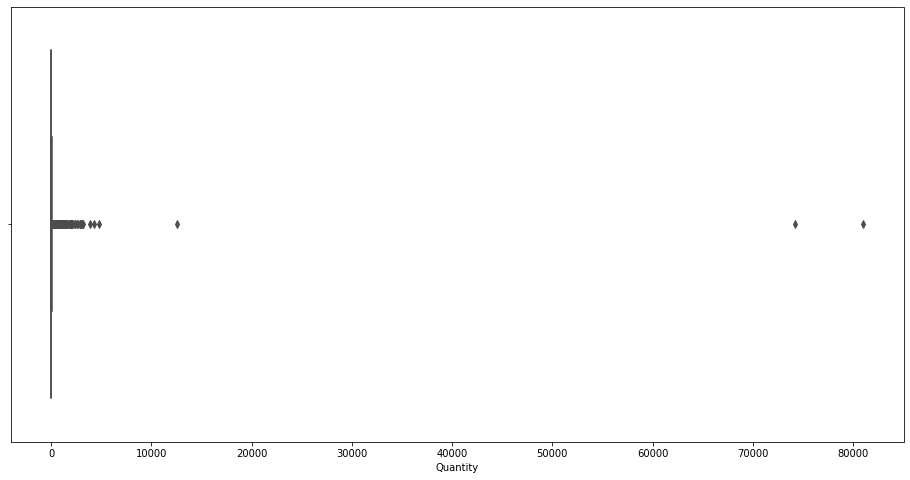

In [108]:
plt.figure(figsize=(16,8))
sns.boxplot(df_orcs["Quantity"],color="Blue")

### **As see in box plot there is some outliers in the quantity column.**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


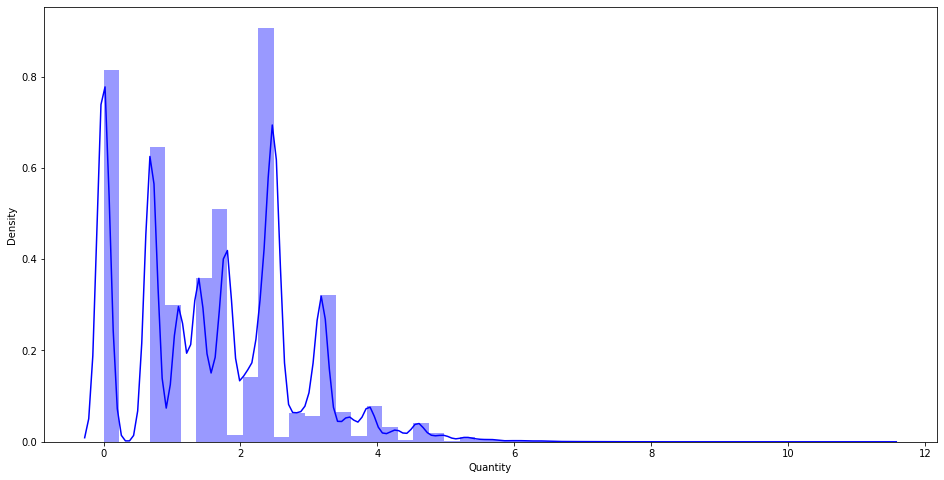

In [109]:
# apply log transformation on quantity column
plt.figure(figsize=(16,8))
sns.distplot(np.log(df_orcs["Quantity"]),color="Blue")

### **After logtransformation we can see the distribution nicely.**

In [110]:
df_orcs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


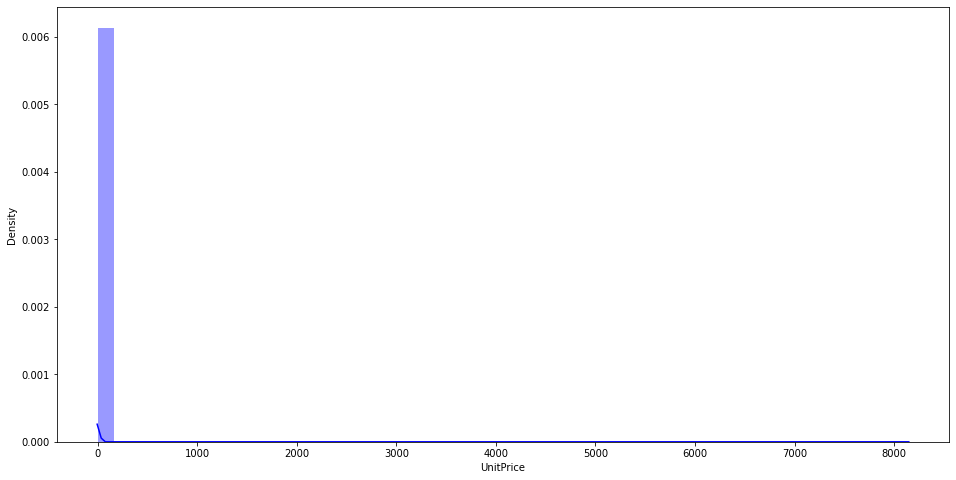

In [111]:
# checking the distribution of unitprice 
plt.figure(figsize=(16,8))
sns.distplot(df_orcs["UnitPrice"],color="Blue")

### **Unitprice data is also positive and skewed.**





### **Feature engineering**

**Add some features to explore**

**Convert InvoiceDate column into datetime datatype**



In [112]:
# extract year,month,day,hour and minute from invoicedate column
df_orcs["InvoiceDate"] = pd.to_datetime(df_orcs["InvoiceDate"] , format = "%d - %m - %y - %H - %M")

####**extract day name from InvoiceDate column.**

In [113]:
# extract day name from invoicedate column
df_orcs["day_name"] = df_orcs["InvoiceDate"].dt.day_name()

####**extract month and hour from InvoiceDate column.**

In [114]:
df_orcs["month"] = df_orcs["InvoiceDate"].dt.month
df_orcs["hour"] = df_orcs["InvoiceDate"].dt.hour

In [115]:
df_day_name = df_orcs["day_name"].value_counts().reset_index()
df_day_name.rename(columns={"index" : "day name", "day_name" : "counts"},inplace=True)
df_day_name

,day name,counts
0,Thursday,80052
1,Wednesday,68888
2,Tuesday,66476
3,Monday,64899
4,Sunday,62775
5,Friday,54834


Text(0.5, 1.0, 'day name')

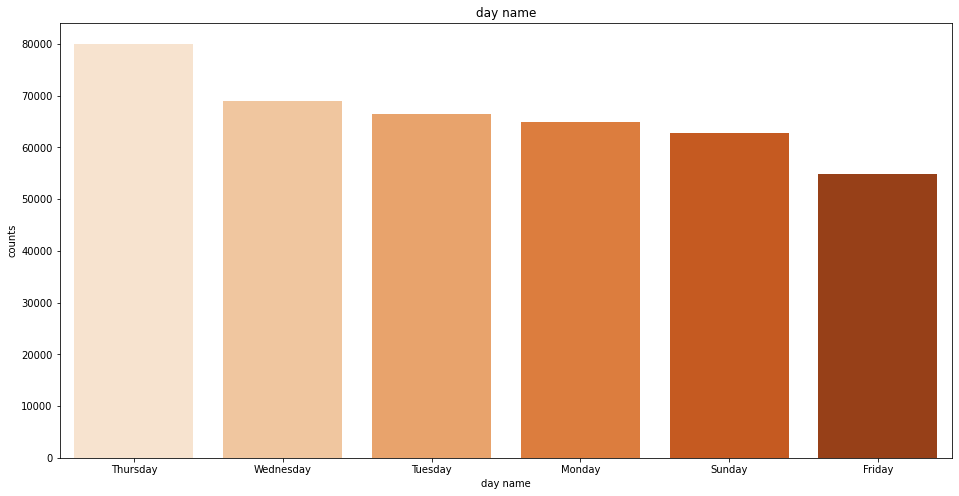

In [116]:
plt.figure(figsize=(16,8))
sns.barplot(x= "day name" , y="counts",palette = "Oranges", data=df_day_name)
plt.title("day name")

### **Most of the customers are like to shop on thuesday then as see in graph then after thursday the shopping is decreses noth next days.**

In [117]:
df_month = df_orcs["month"].value_counts().reset_index()
df_month.rename(columns={"index" : "month", "month" : "counts"},inplace=True)
df_month

,month,counts
0,11,64545
1,10,49557
2,12,43464
3,9,40030
4,5,28322
5,6,27185
6,3,27177
7,8,27013
8,7,26827
9,4,22644


Text(0.5, 1.0, 'month')

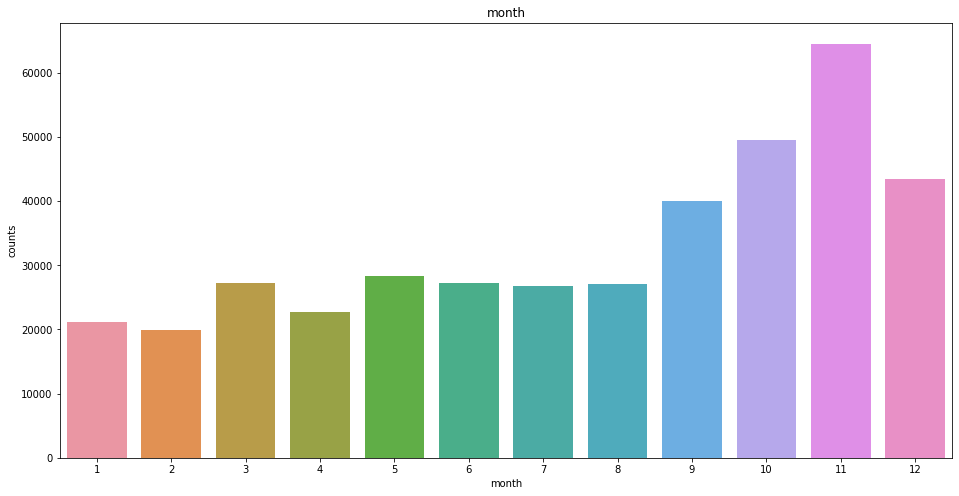

In [118]:
# bar graph of month 
plt.figure(figsize=(16,8))
sns.barplot(x= "month" , y="counts", data=df_month)
plt.title("month")

### **As seen in graph that the shopping made by customer is increses sfter september month till december month, but the highest shopping is msde in nevember month.**

In [119]:
df_hour = df_orcs["hour"].value_counts().reset_index()
df_hour.rename(columns={"index" : "hour", "hour" : "counts"},inplace=True)
df_hour

,hour,counts
0,12,72069
1,13,64031
2,14,54127
3,11,49092
4,15,45372
5,10,37999
6,16,24093
7,9,21945
8,17,13072
9,8,8691


Text(0.5, 1.0, 'hour')

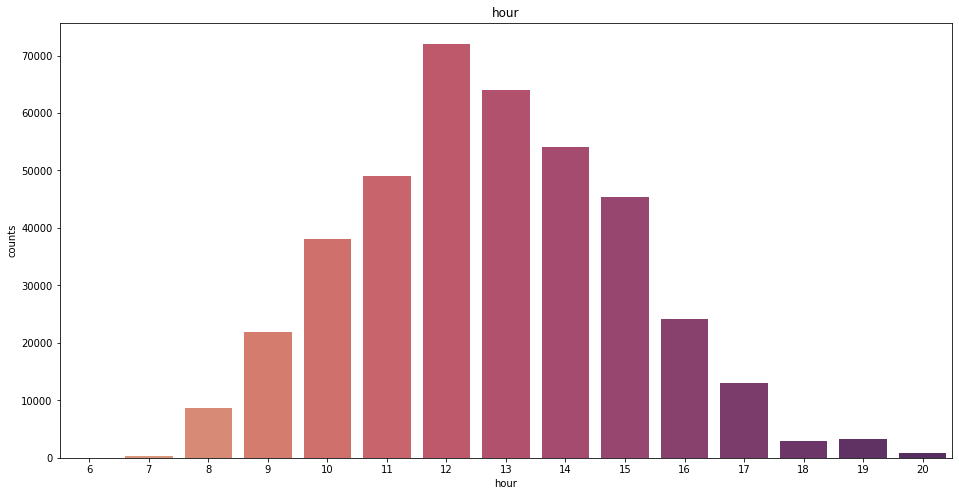

In [120]:
# bar graph of hour
plt.figure(figsize=(16,8))
sns.barplot(x= "hour" , y="counts",palette= "flare",data=df_hour)
plt.title("hour")

### **As see in bar plot that highest purchases made at afternoot time by the customes.**

## **Create the RFM model (Recency, Frequency, Monetary)**

###**Recency :** It stores the number of days the customer has sone his last purchase with respect to last date in the dataset. it is just to find the perticular customer is last purchased from store.

###**Frequency :** It is the number of time each customer has made a purchase by counting unique invoice date by esch customer while making a purchase.

###**Monetary :** It is the total amount spent by the customer.

# **Monetary**:

In [121]:
df_orcs.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'day_name', 'month', 'hour'],
      dtype='object')

In [122]:
# first create the total_amount column
df_orcs["total_amount"] = df_orcs["Quantity"] * df_orcs["UnitPrice"]

In [123]:
df_monetary = df_orcs.groupby("CustomerID")["total_amount"].sum()
df_monetary = pd.DataFrame(df_monetary).reset_index().rename(columns = ({"CustomerID" : "CustomerID", "total_amount" : "Monetary"}))
df_monetary.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


## **Frequency**

### **Calculate the number of time each customer purchased from store.**

In [124]:
# groupby the customerid and invoiceno column

df_frequency = df_orcs.groupby("CustomerID")["InvoiceNo"].count()
df_frequency = pd.DataFrame(df_frequency).reset_index().rename(columns = ({"CustomerID" : "CustomerID", "InvoiceNo" : "Frequency"}))
df_frequency.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


## **Recency:**

In [125]:
# find the maximum date in invoice date column

max_date = df_orcs["InvoiceDate"].max()
print(max_date)

2011-12-09 12:50:00


**2011-12-09 12:50:00 this is the maximum date in dataset.**

In [126]:
# find difference between max date and transection date

df_orcs["diff"] = max_date - df_orcs["InvoiceDate"]
df_orcs.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day_name,month,hour,total_amount,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,12,8,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,12,8,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,12,8,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,12,8,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,12,8,20.34,373 days 04:24:00


In [127]:
df_recency = df_orcs.groupby("CustomerID")["diff"].min()
df_recency = pd.DataFrame(df_recency).reset_index().rename(columns =  ({"CustomerID" : "CustomerID", "diff" : "Recency"}))
df_recency.head()

,CustomerID,Recency
0,12346.0,325 days 02:49:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


#### **Extract the difference day from the Recency column.**

In [128]:
# we need diffenece day so extract days

def days(x):
  y = str(x).split()[0]
  return int(y)

df_recency["Recency"] = df_recency["Recency"].apply(days)
df_recency.head()

,CustomerID,Recency
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [129]:
# merge the df_recency, df_monetary, df_frequency column

rfm = pd.merge(df_monetary , df_frequency, on= "CustomerID" , how = "inner")
rfm.head()

,CustomerID,Monetary,Frequency
0,12346.0,77183.60,1
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [130]:
# merge df_recency with rfm dataframe

df_rfm = pd.merge(rfm , df_recency, on= "CustomerID" , how = "inner")
df_rfm.head()

,CustomerID,Monetary,Frequency,Recency
0,12346.0,77183.60,1,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [131]:
df_rfm

,CustomerID,Monetary,Frequency,Recency
0,12346.0,77183.60,1,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309
...,...,...,...,...
4334,18280.0,180.60,10,277
4335,18281.0,80.82,7,180
4336,18282.0,178.05,12,7
4337,18283.0,2094.88,756,3


# **Outlier in Recency , Monetary , Frequency columns**

Text(0, 0.5, 'Range')

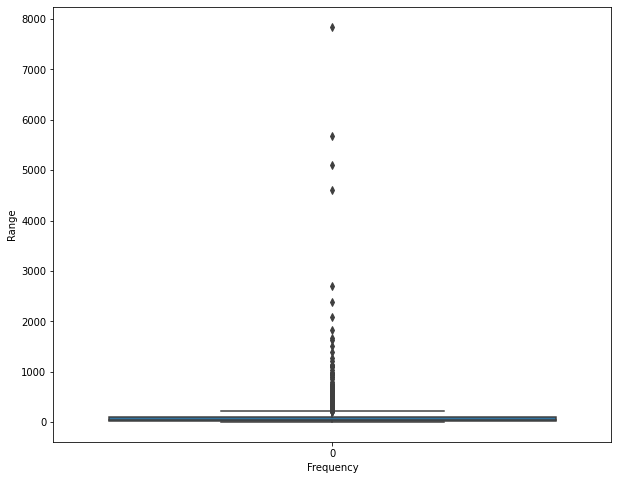

In [132]:
# boxplote of Frequency
plt.figure(figsize=(10,8))
sns.boxplot(data = df_rfm["Frequency"], orient="v")
plt.xlabel("Frequency")
plt.ylabel("Range")

Text(0, 0.5, 'Range')

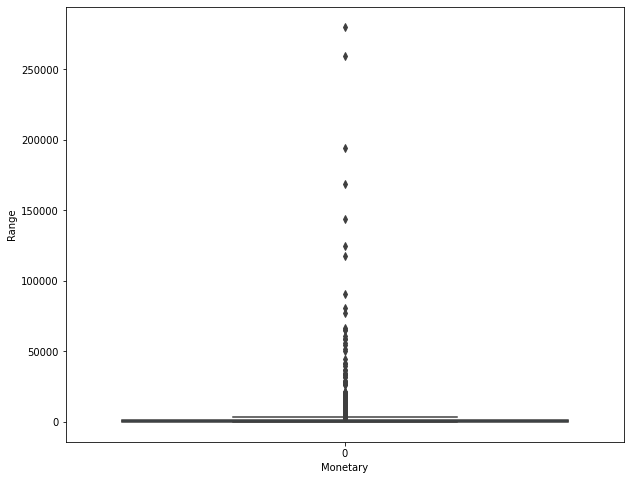

In [133]:
# boxplote of Monetary
plt.figure(figsize=(10,8))
sns.boxplot(data = df_rfm["Monetary"], orient="v")
plt.xlabel("Monetary")
plt.ylabel("Range")

Text(0, 0.5, 'Range')

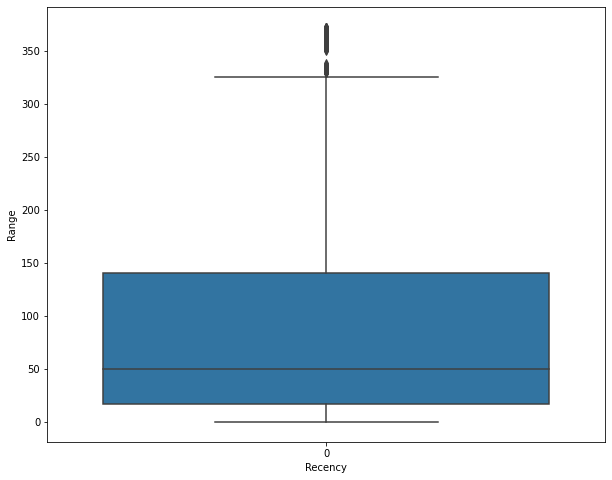

In [134]:
# boxplote of Recency
plt.figure(figsize=(10,8))
sns.boxplot(data = df_rfm["Recency"], orient="v")
plt.xlabel("Recency")
plt.ylabel("Range")

### **We have to treat the outliers because that will skewed the data and that is affect in process detecting clusters, so we have to drop the outliers.**

In [135]:
# removing outliers in Recency column
Q1 = df_rfm["Recency"].quantile(0.25)
Q3 = df_rfm["Recency"].quantile(0.75)
IQR = Q3 - Q1
df_rfm = df_rfm[(df_rfm["Recency"] >= Q1 - 1.5*IQR) & (df_rfm["Recency"] <= Q3 + 1.5*IQR)]

# removing outliers in Monetary column
Q1 = df_rfm["Monetary"].quantile(0.25)
Q3 = df_rfm["Monetary"].quantile(0.75)
IQR = Q3 - Q1
df_rfm = df_rfm[(df_rfm["Monetary"] >= Q1 - 1.5*IQR) & (df_rfm["Monetary"] <= Q3 + 1.5*IQR)]

# removing outliers in Frequency column
Q1 = df_rfm["Frequency"].quantile(0.25)
Q3 = df_rfm["Frequency"].quantile(0.75)
IQR = Q3 - Q1
df_rfm = df_rfm[(df_rfm["Frequency"] >= Q1 - 1.5*IQR) & (df_rfm["Frequency"] <= Q3 + 1.5*IQR)]

In [136]:
df_rfm.head()

,CustomerID,Monetary,Frequency,Recency
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309
5,12352.0,2506.04,85,35
6,12353.0,89.00,4,203


## **Standardisation**

### **As cluster algorithm is based on the distance between the data points, we need to scale the data to normal distribution.**

In [137]:
#scale the data
from sklearn.preprocessing import StandardScaler

df_scaled = df_rfm[["Monetary","Frequency","Recency"]]
scale = StandardScaler()

df_rfm_scaled = scale.fit_transform(df_scaled)
df_rfm_scaled = pd.DataFrame(df_rfm_scaled)
df_rfm_scaled.columns = ["Monetary","Frequency","Recency"]


In [138]:
df_rfm_scaled.head()

,Monetary,Frequency,Recency
0,1.208780,-0.406480,-0.201230
1,1.158561,0.582604,-0.825315
2,-0.642121,-0.736175,2.417698
3,2.105610,0.865200,-0.635861
4,-0.952620,-1.042321,1.236394


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


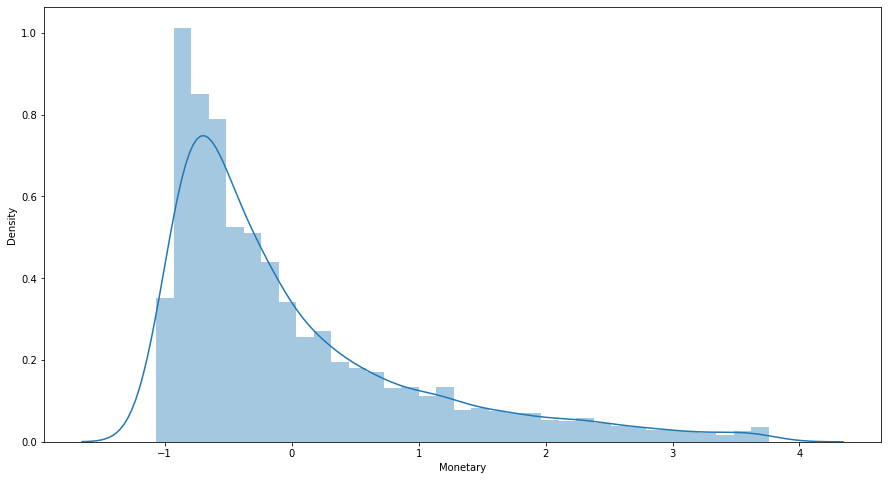

In [139]:
# distribution data after transformation in monetary

monetary_plot = df_rfm_scaled['Monetary']
plt.figure(figsize=(15,8))
sns.distplot(monetary_plot)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


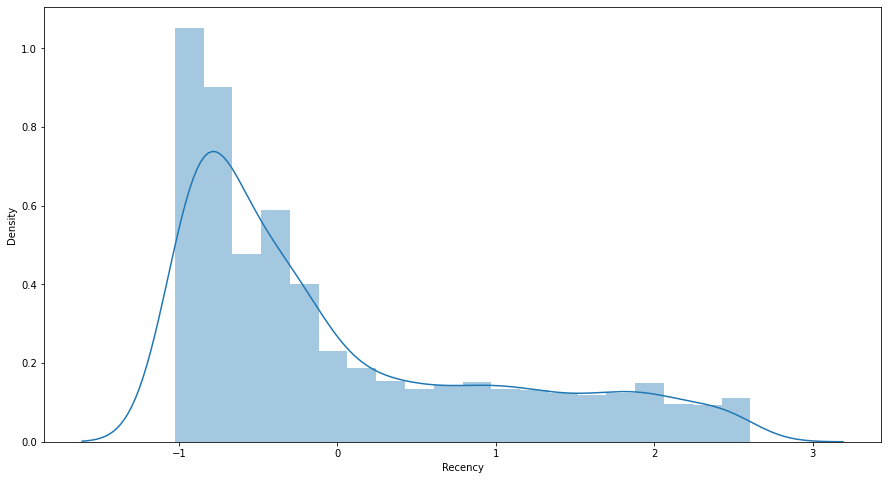

In [140]:
# distribution data after transformation in Recency
Recency_plot = df_rfm_scaled['Recency']
plt.figure(figsize=(15,8))
sns.distplot(Recency_plot)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


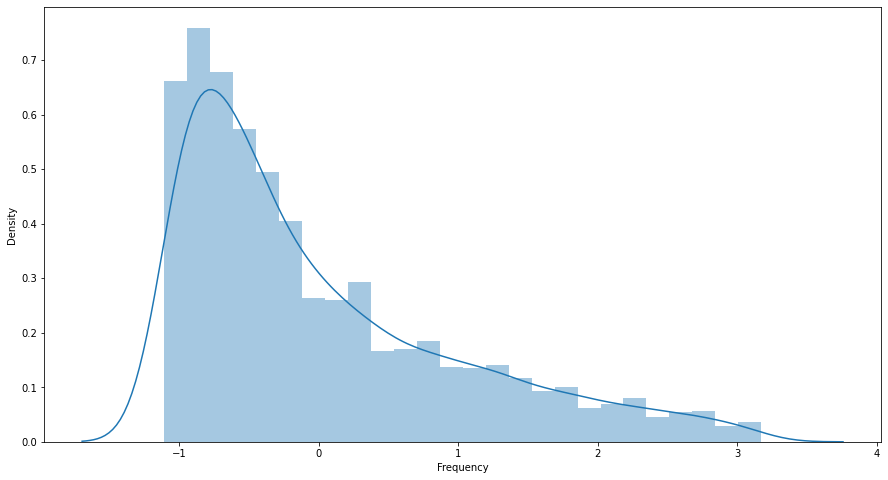

In [141]:
# distribution data after transformation in frequency
Frequency_plot = df_rfm_scaled['Frequency']
plt.figure(figsize=(15,8))
sns.distplot(Frequency_plot)

## **K Means clustering**

## **elbow method**

In [142]:
# import KMeans cluster
from sklearn.cluster import KMeans

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'elbow method for optimal k')

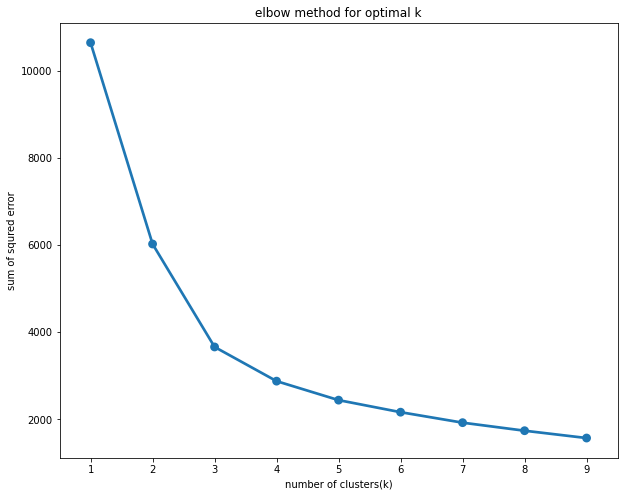

In [143]:
k_values = list(range(1,10))
sum_of_sqrt_error = []

for k in k_values:
  kmeans = KMeans(n_clusters= k, init = "k-means++", max_iter= 1000)
  kmeans.fit_transform(df_rfm_scaled)
  sum_of_sqrt_error.append(kmeans.inertia_)
  

# plot the graph to find the optimal number of clusters

plt.figure(figsize=(10,8))
sns.pointplot(k_values, sum_of_sqrt_error)
plt.xlabel("number of clusters(k)")
plt.ylabel("sum of squred error")
plt.title("elbow method for optimal k")

### **As see in elbow graph that at k=3 it has elbow so we choose number of clusters are 3.**

In [144]:
# build kmeans clustering model

kmeans = KMeans(n_clusters= 3, init = "k-means++", max_iter= 1000)
kmeans.fit_transform(df_rfm_scaled)



array([[1.55840432, 1.91859091, 2.47816794],
       [1.7710951 , 0.96457128, 3.13492504],
       [2.95022709, 4.23885813, 0.92076412],
       ...,
       [1.7249531 , 3.74463838, 0.76342418],
       [0.86983207, 3.2707615 , 2.48846114],
       [1.79221907, 0.96998657, 2.97462396]])

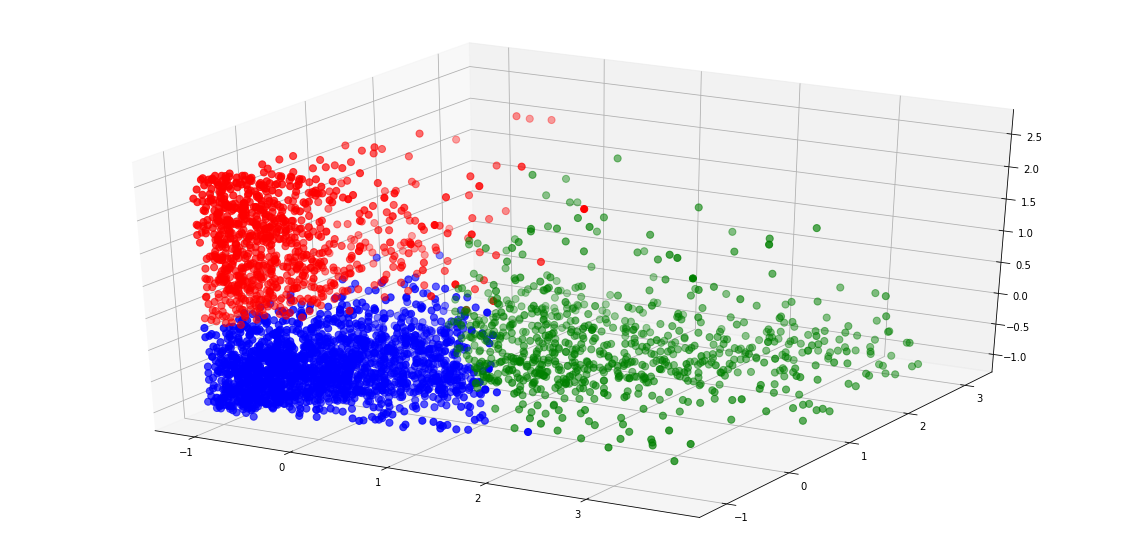

In [145]:
# visualise the clusters

clusters = kmeans.labels_

RFM = df_rfm_scaled
RFM["labels"] = clusters

fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(RFM["Monetary"][RFM.labels == 0], RFM["Frequency"][RFM.labels == 0], RFM["Recency"][RFM.labels == 0], c ="Blue", s=50)
ax.scatter(RFM["Monetary"][RFM.labels == 1], RFM["Frequency"][RFM.labels == 1], RFM["Recency"][RFM.labels == 1], c ="green", s=50)
ax.scatter(RFM["Monetary"][RFM.labels == 2], RFM["Frequency"][RFM.labels == 2], RFM["Recency"][RFM.labels == 2], c ="red", s=50)

In [146]:
features  = ["Monetary","Frequency","Recency"]
x_features = df_rfm_scaled[features].values
X=x_features

### **silhouette method to find optimal number of cluster**

For n_clusters = 2 The average silhouette_score is : 0.4241233780424803
For n_clusters = 3 The average silhouette_score is : 0.44290826603429573
For n_clusters = 4 The average silhouette_score is : 0.41017873483215406
For n_clusters = 5 The average silhouette_score is : 0.40387625875938143
For n_clusters = 6 The average silhouette_score is : 0.35884286905620383
For n_clusters = 7 The average silhouette_score is : 0.331194062295856
For n_clusters = 8 The average silhouette_score is : 0.3433953351498436
For n_clusters = 9 The average silhouette_score is : 0.34948398333502767
For n_clusters = 10 The average silhouette_score is : 0.3544860835839998
For n_clusters = 11 The average silhouette_score is : 0.32205785029493544
For n_clusters = 12 The average silhouette_score is : 0.3015739110127334
For n_clusters = 14 The average silhouette_score is : 0.2976856591263706
For n_clusters = 16 The average silhouette_score is : 0.3044301674291324
For n_clusters = 18 The average silhouette_score is : 

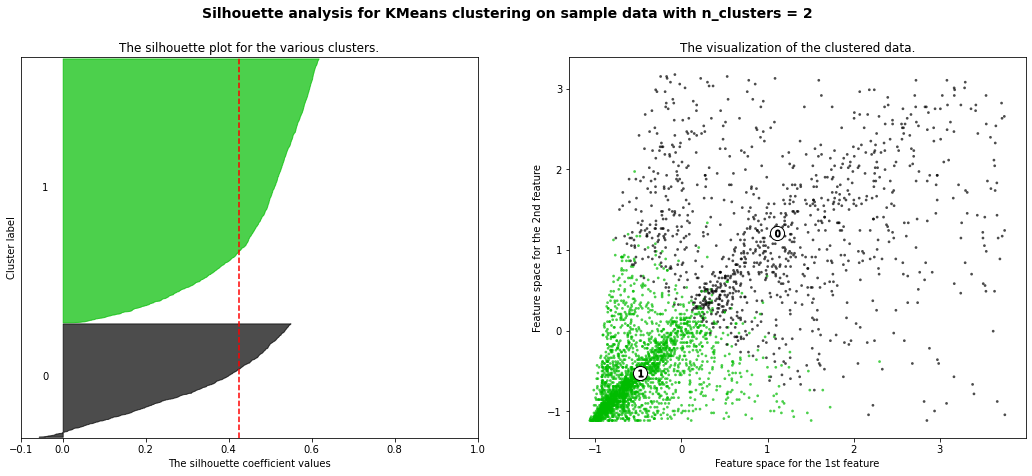

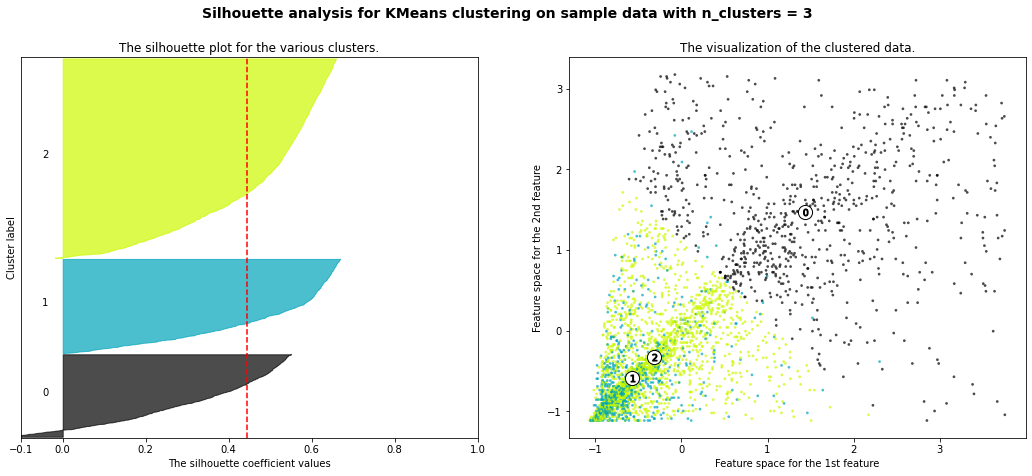

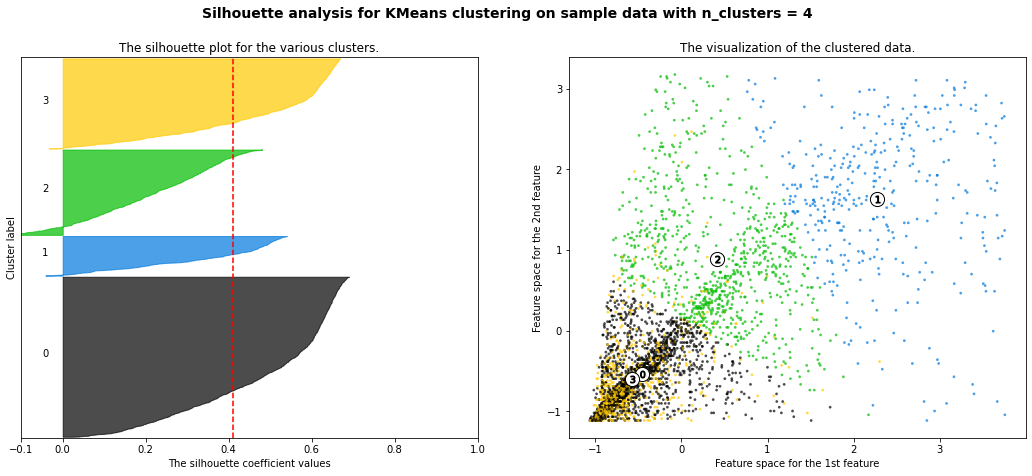

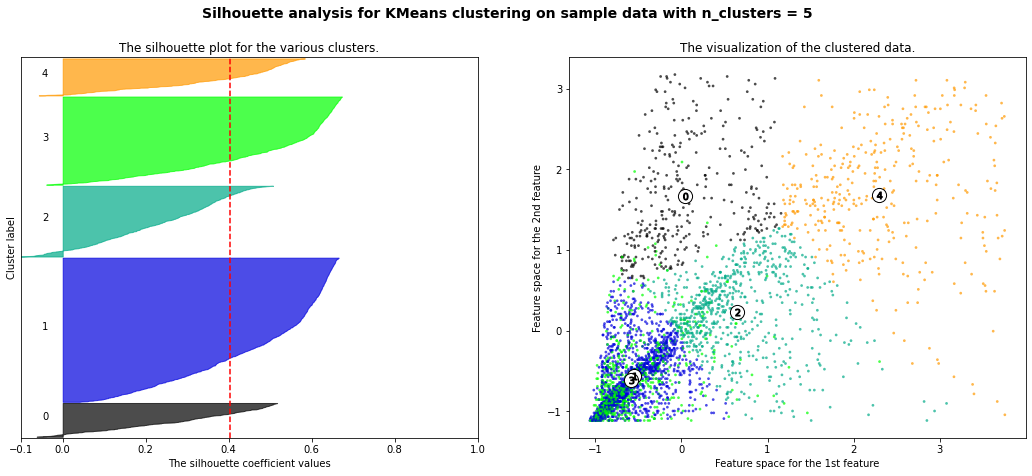

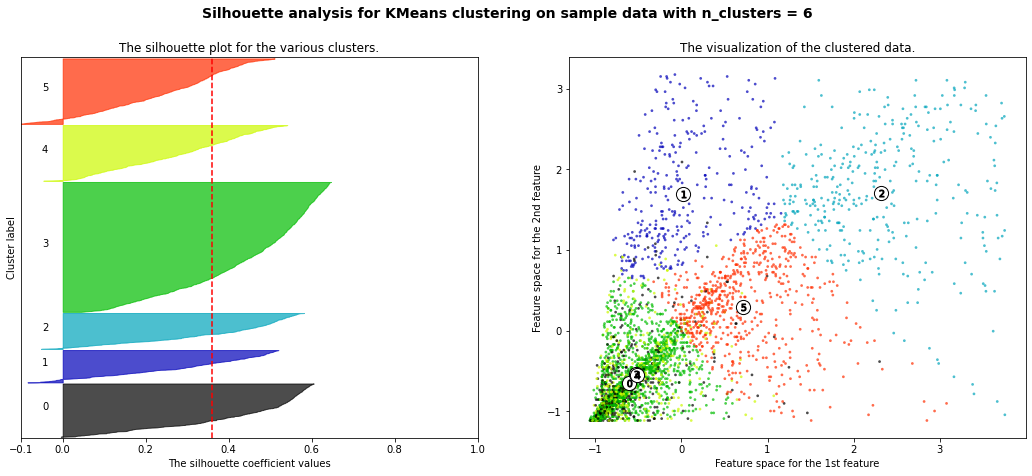

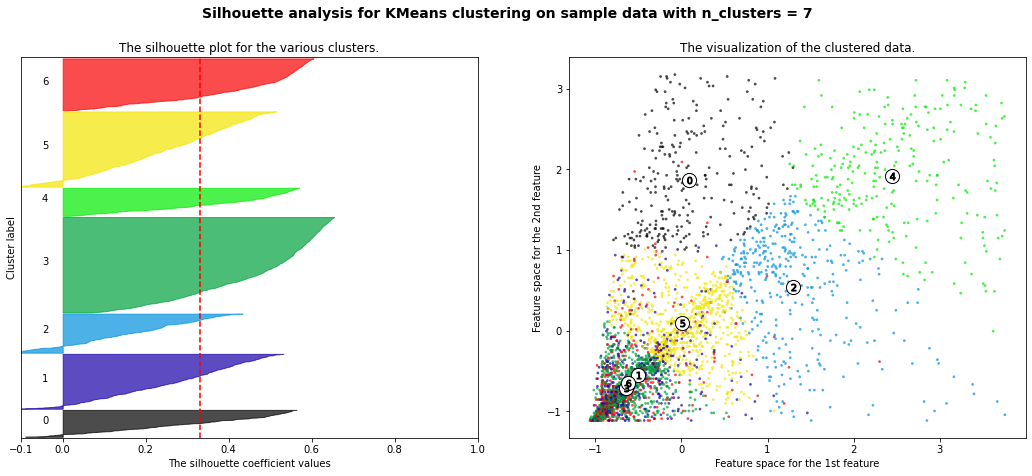

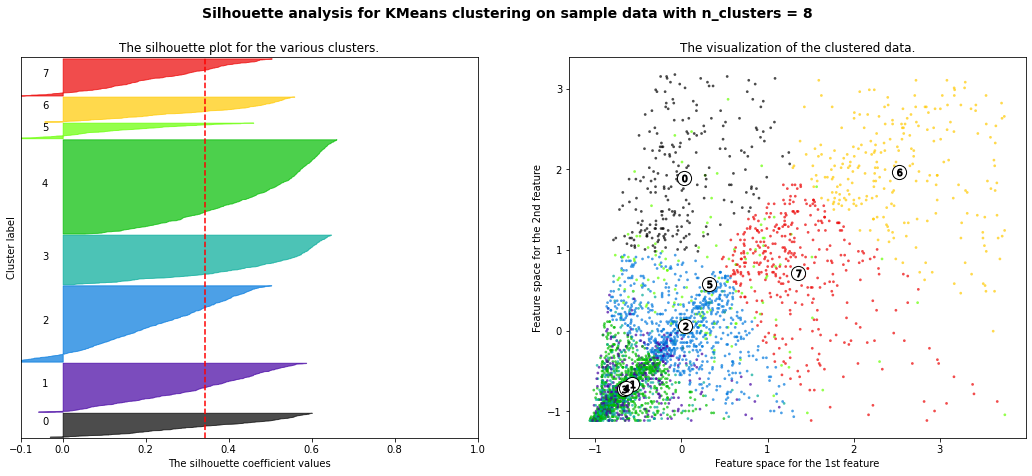

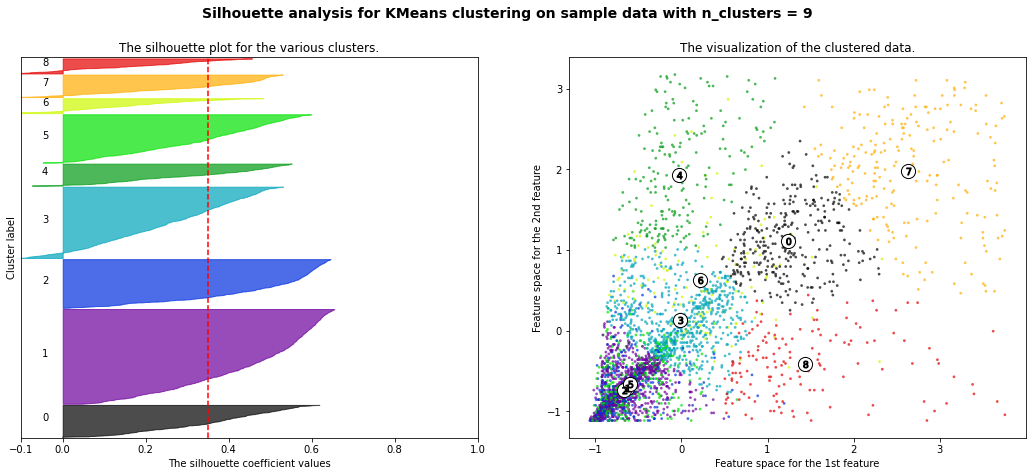

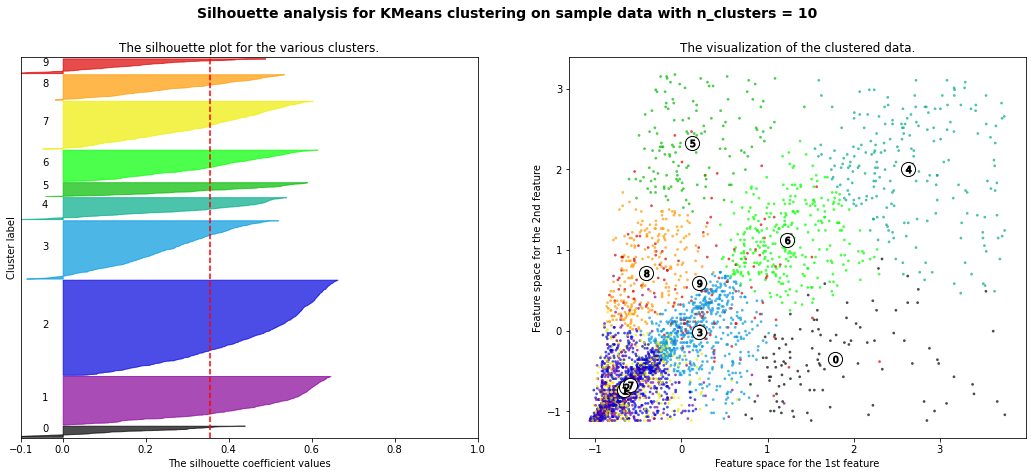

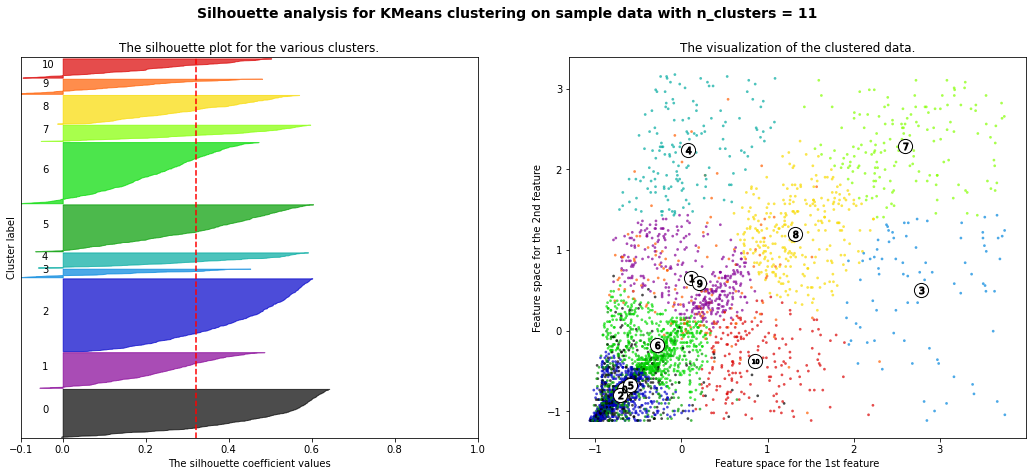

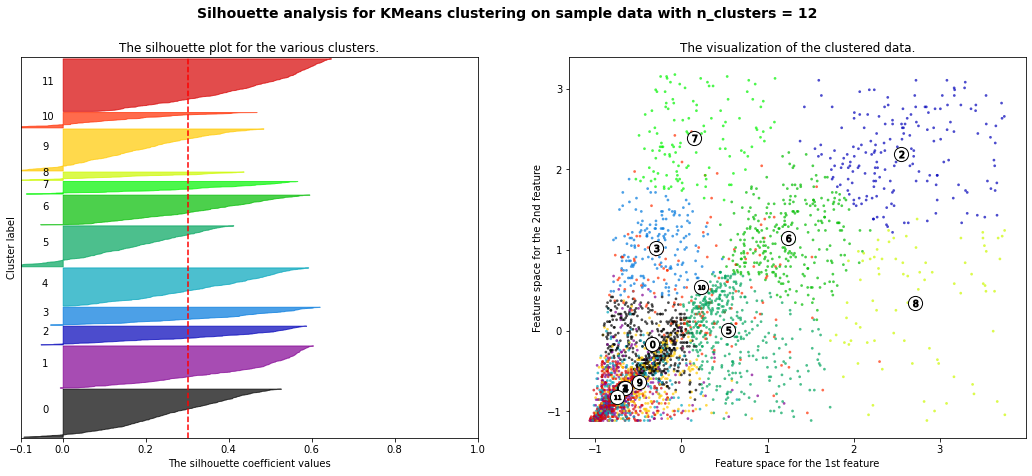

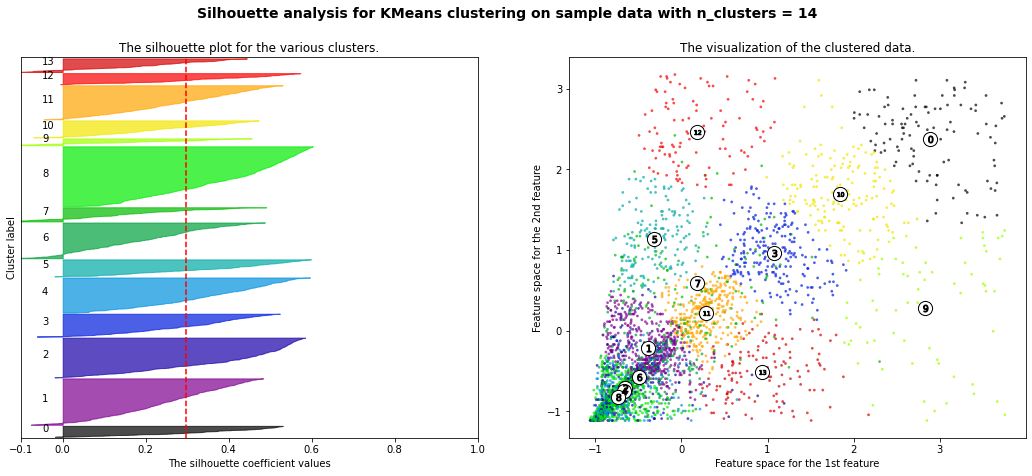

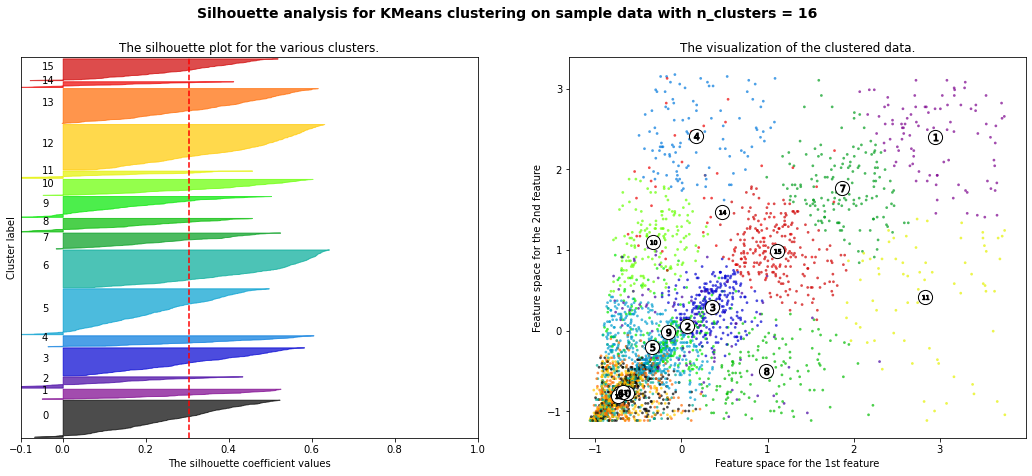

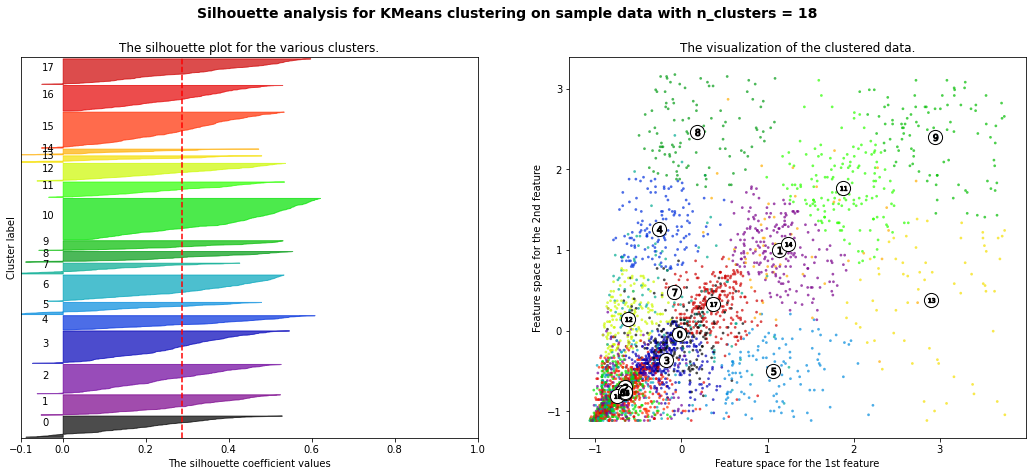

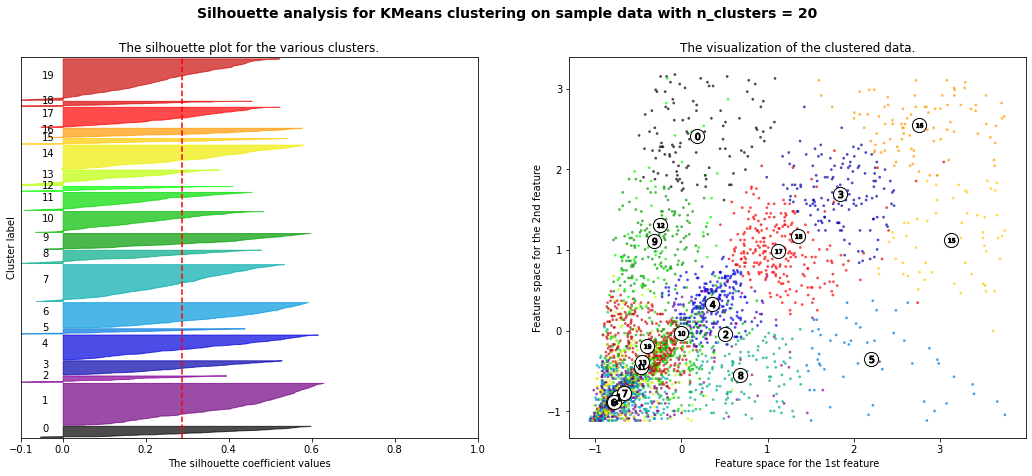

In [147]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,14,16,18,20]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples. This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## **Hierarchical clustering**

### **find the optimal number of clusters using dendrogram**




Text(0.5, 1.0, 'Dendrogram')

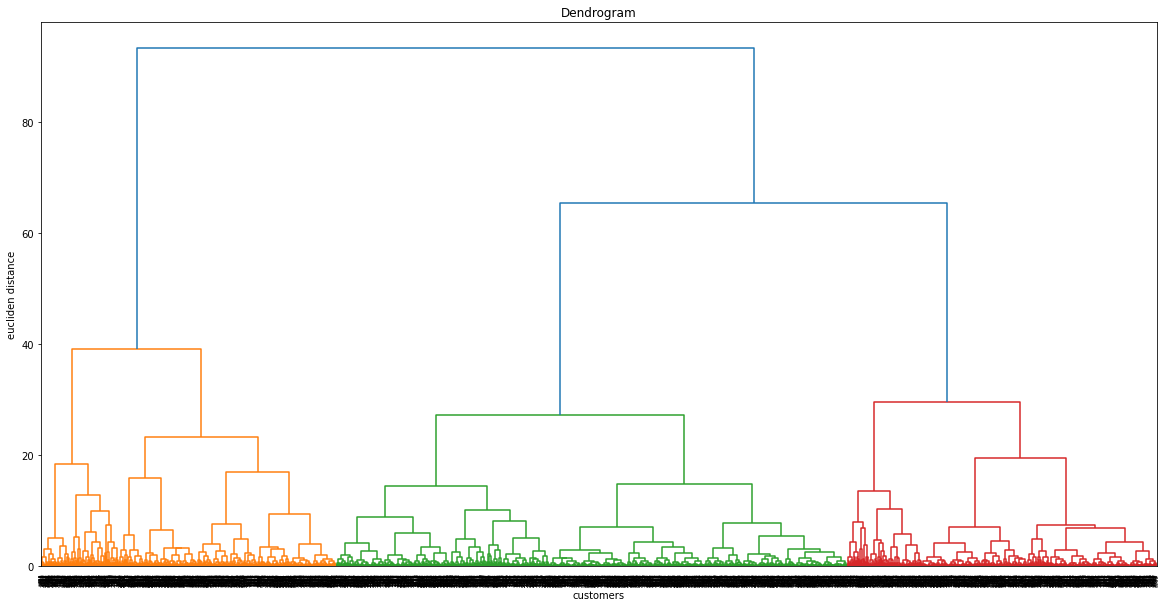

In [148]:
import scipy.cluster.hierarchy as sch

fig = plt.figure(figsize = (20,10))
dendrogram = sch.dendrogram(sch.linkage(X, method = "ward"))
plt.xlabel("customers")
plt.ylabel("eucliden distance")
plt.title("Dendrogram")

### **As see in dendrogram number of clusters are 3.**

In [149]:
# 3 clusters fitting hierarchical clustering to dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = "euclidean", linkage = "ward")
y_hierc = hc.fit_predict(X)

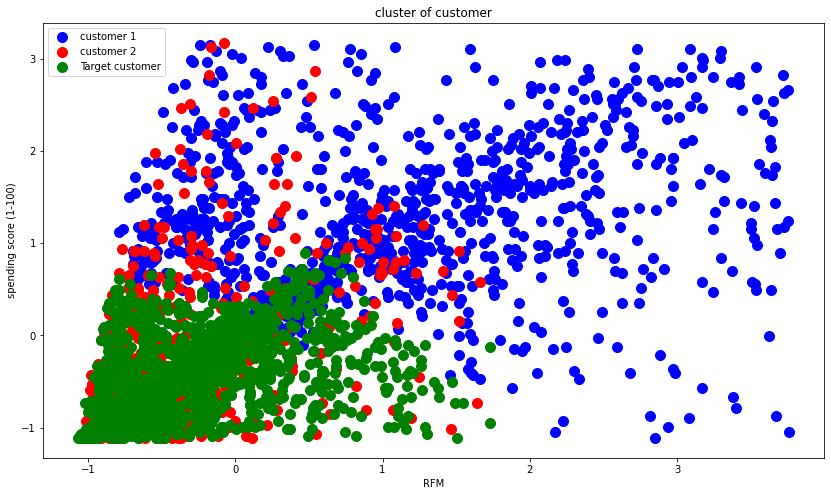

In [150]:
# visuization od cluster
fig = plt.figure(figsize = (14,8))
plt.scatter(X[y_hierc == 0,0],X[y_hierc == 0,1], s = 100 , c="blue", label = "customer 1")
plt.scatter(X[y_hierc == 1,0],X[y_hierc == 1,1], s = 100 , c="red", label = "customer 2")
plt.scatter(X[y_hierc == 2,0],X[y_hierc == 2,1], s = 100 , c="green", label = "Target customer")

plt.xlabel("RFM")
plt.ylabel("spending score (1-100)")
plt.title("cluster of customer")
plt.legend()


## **By applying different clustering algorithm , we get the optimum number of clusters =3**

# **Summary table:**

In [151]:
from prettytable import PrettyTable

# specify the column name 
table = PrettyTable(["No.","Model Name","Optimal number of clusters"])

# add tyhe number of rows
table.add_row(["1","KMeans with elbow method","3"])
table.add_row(["2","KMeans with silhouette method","3"])
table.add_row(["3","Hierarchical clustering","3"])
print(table)


+-----+-------------------------------+----------------------------+
| No. |           Model Name          | Optimal number of clusters |
+-----+-------------------------------+----------------------------+
|  1  |    KMeans with elbow method   |             3              |
|  2  | KMeans with silhouette method |             3              |
|  3  |    Hierarchical clustering    |             3              |
+-----+-------------------------------+----------------------------+


## **Conclusion:**

###cluster 0 is loyal customer they are frequent and heavy spending customers.
###cluster 1 is new customer they are recently visited to store with minimum frequency and spending.
###cluster 2 is Risk of leaving type of customer they are Average spenders and moderately visited to store.